# HighD Trajectory Data Analysis

## Brief Introduction to HighD

HighD is a dataset collected by Aachen University, German. This dataset "includes post-processed trajectories of 110 000 vehicles including cars and trucks extracted from drone video recordings at German highways around Cologne during 2017 and 2018. At six different locations, 60 recordings were made with an average length of 17 minutes (16.5 h in total) covering a road segment of about 420 m length. Each vehicle is visible for a median duration of 13.6 s."

This repository provides a data sample including less than 5% of the original dataset. It also provides a visualized insight into the complete dataset. For those interested in accessing the complete dataset, please follow this [link](https://www.highd-dataset.com/).

### Specialties about HighD dataset

HighD is the first trajectory dataset published by LevelX. Its annotations are slightly different from its siblings InD, RounD.

- **coordinate system**: The coordinate system of the HighD dataset is unique. As is shown in the following figure. It starts from the left-upper position of the road. If you want to restore the trajectories, it will be better reverse the y-axis (use $(x,-y)$ instead of $(x,y)$).

- **location of vehicles**: The HighD dataset take left-upper corner of the bounding box to represent the location of every vehicle.

- **disaligned original points**: The original points of coordinate system are different from file to file, even for the same map.

*FYI. There is no speed limit to highway in Germany.*

### Trajectory Types in HighD

In highD, all trajectory are from vehicles. All vehicles fall into two categories:

- `Car`
- `Truck`

### Match Trajectory Data with Maps

According to meta records:

- Trajectory data files 01-03 are recorded in location 2 (denoted as highD_2)
- Trajectory data files 04-06 are recorded in location 3 (denoted as highD_3)
- Trajectory data files 07-10 are recorded in location 4 (denoted as highD_4)
- Trajectory data files 11-14, 25-57 are recorded in location 1 (denoted as highD_1)
- Trajectory data files 15-24 are recorded in location 5 (denoted as highD_5)
- Trajectory data files 58-60 are recorded in location 6 (denoted as highD_6)

In [1]:
import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

import json

import matplotlib.transforms as mtransforms

from utils import levelx

with open("../map/map.config", "r") as f:
    configs = json.load(f)

data_path = "../trajectory/highD/data"
img_path = "../img/highD"
trajectory_types = ["Car", "Truck"]

## Data Analysis

The data analysis will first present visualizations of both the map and trajectory data and then analysis the speed distribution and lane changing frequency of vehicles, categorized by their types.

### Map and Trajectory Visualization

The trajectories in highD are collected from six locations in highways near Cologne. The sample distance is 400-420 m. This section visualizes the `Car` and `Truck` trajectories on the corresponding maps.

![Locations of recording included in highD](../img/md/highD_locations.png)

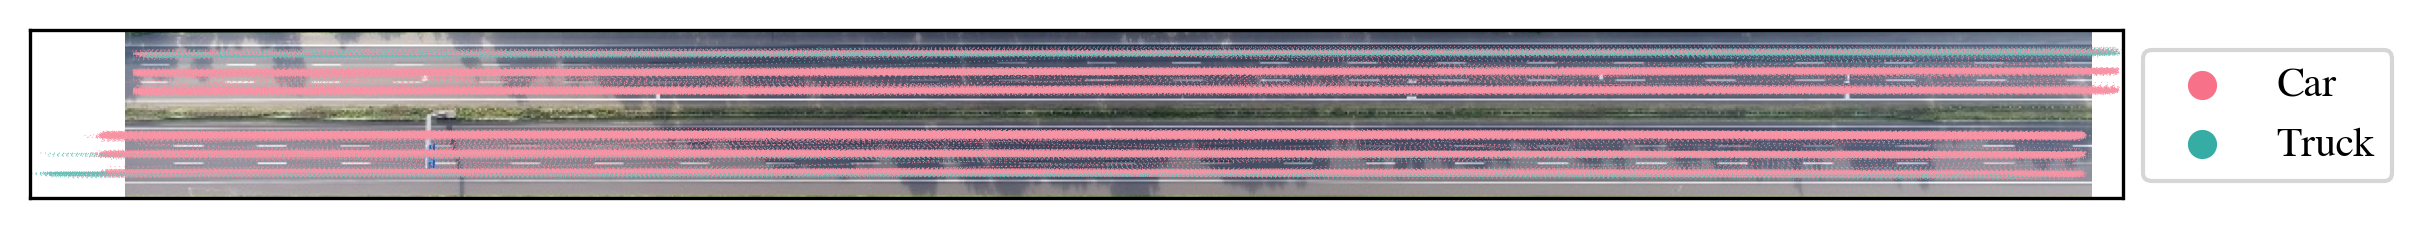

In [2]:
transform1 = mtransforms.Affine2D().scale(0.4).translate(0, -1)
levelx.plot_map_and_trajectories(
    "highD_1", data_path, img_path, transform1, trajectory_types, configs
)

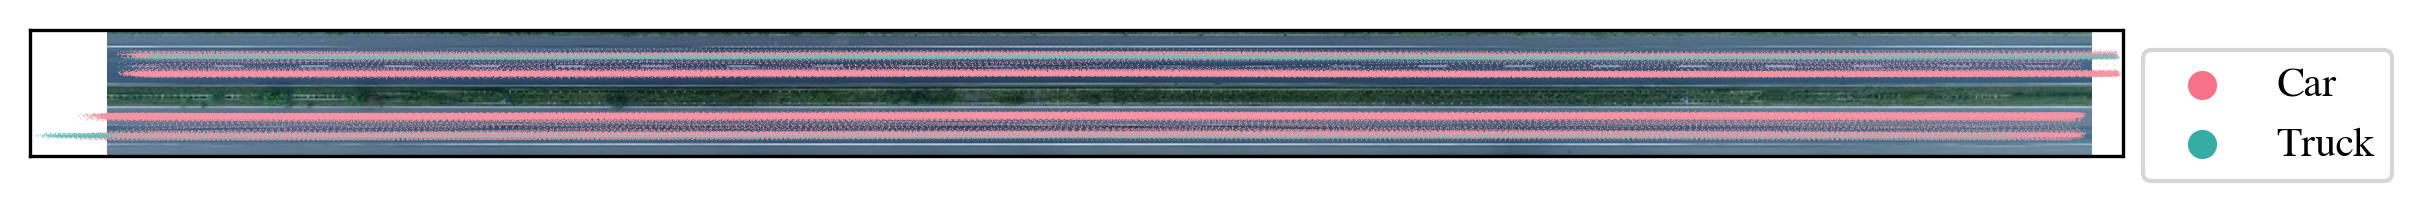

In [3]:
transform2 = mtransforms.Affine2D().scale(0.4).translate(0, -1)
levelx.plot_map_and_trajectories(
    "highD_2", data_path, img_path, transform2, trajectory_types, configs
)

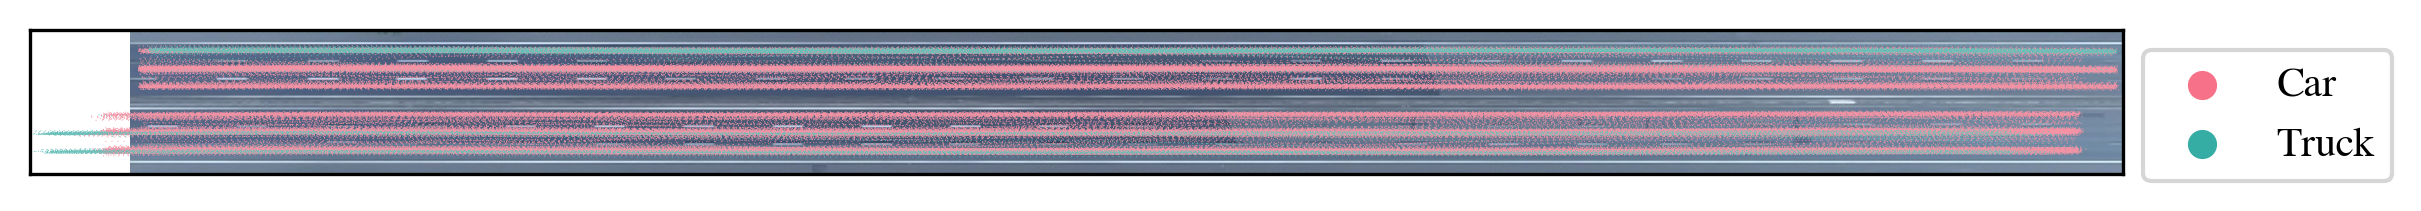

In [4]:
transform3 = mtransforms.Affine2D().scale(0.412).translate(0, -1.65)
levelx.plot_map_and_trajectories(
    "highD_3", data_path, img_path, transform3, trajectory_types, configs
)

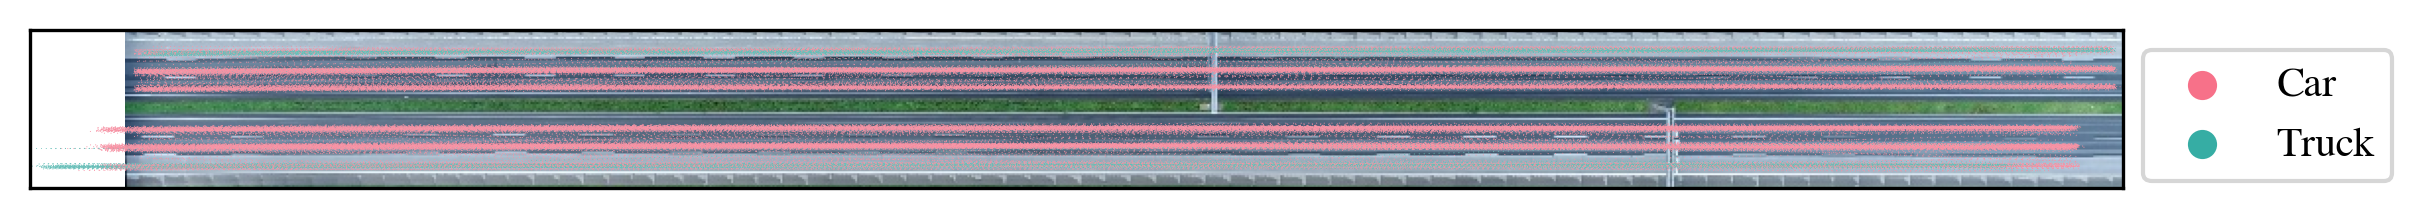

In [5]:
transform4 = mtransforms.Affine2D().scale(0.41).translate(0, -1)
levelx.plot_map_and_trajectories(
    "highD_4", data_path, img_path, transform4, trajectory_types, configs
)

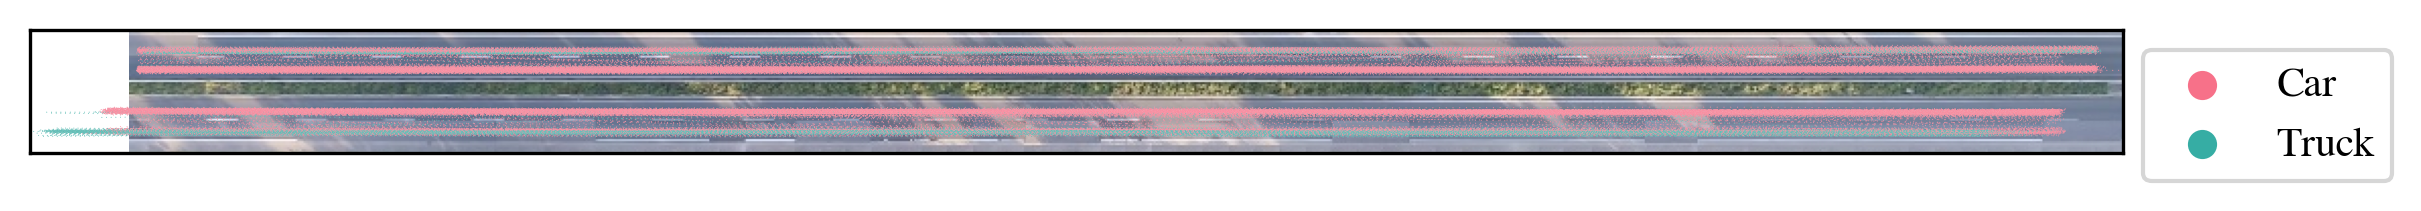

In [6]:
transform5 = mtransforms.Affine2D().scale(0.4266).translate(0, -1.39)
levelx.plot_map_and_trajectories(
    "highD_5", data_path, img_path, transform5, trajectory_types, configs
)

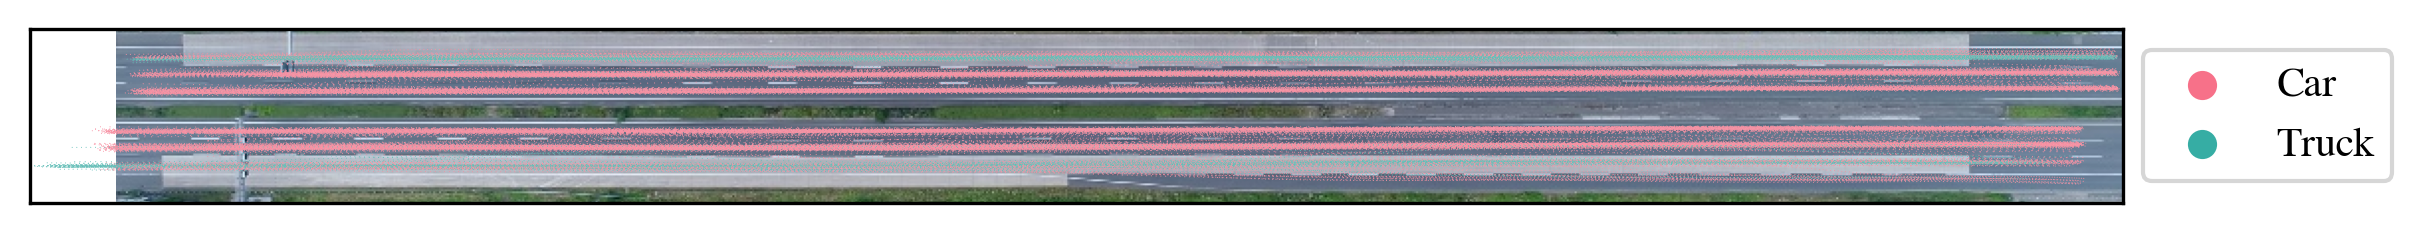

In [7]:
transform6 = mtransforms.Affine2D().scale(0.411).translate(0, -1.71)
levelx.plot_map_and_trajectories(
    "highD_6", data_path, img_path, transform6, trajectory_types, configs
)

### Proportion of Trajectory Types

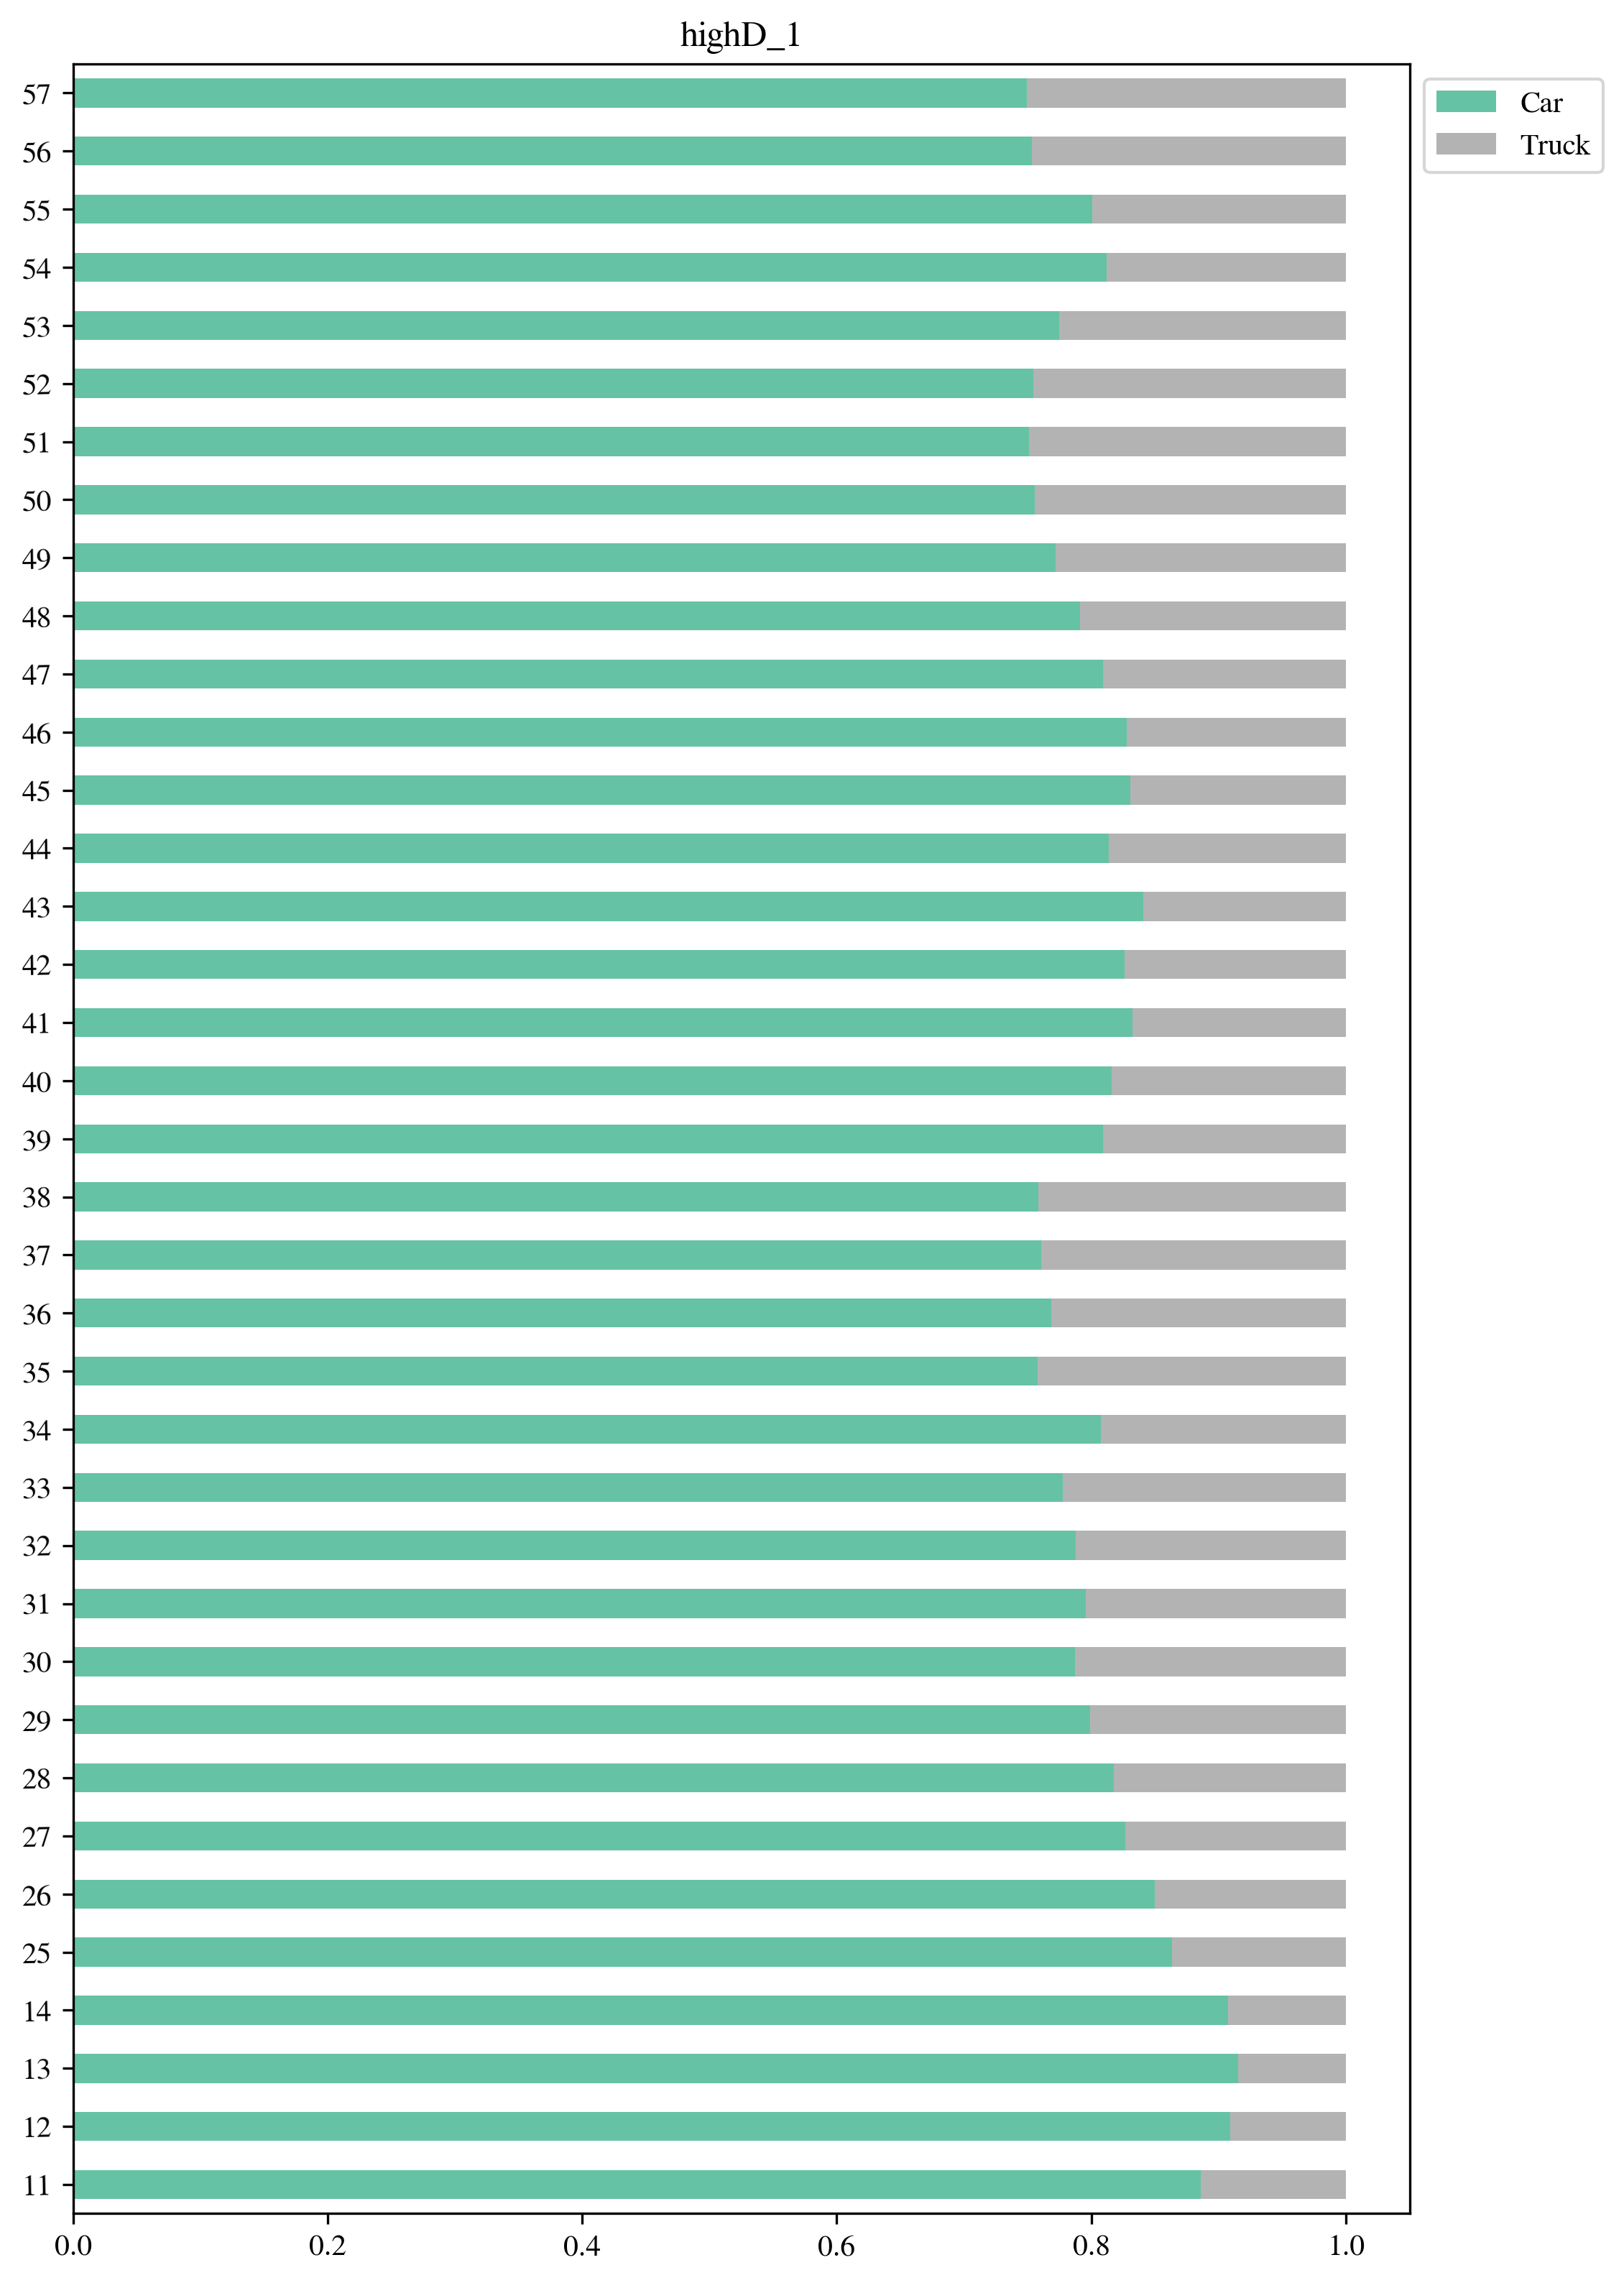

In [8]:
levelx.plot_class_proportion("highD_1", data_path, trajectory_types, configs)

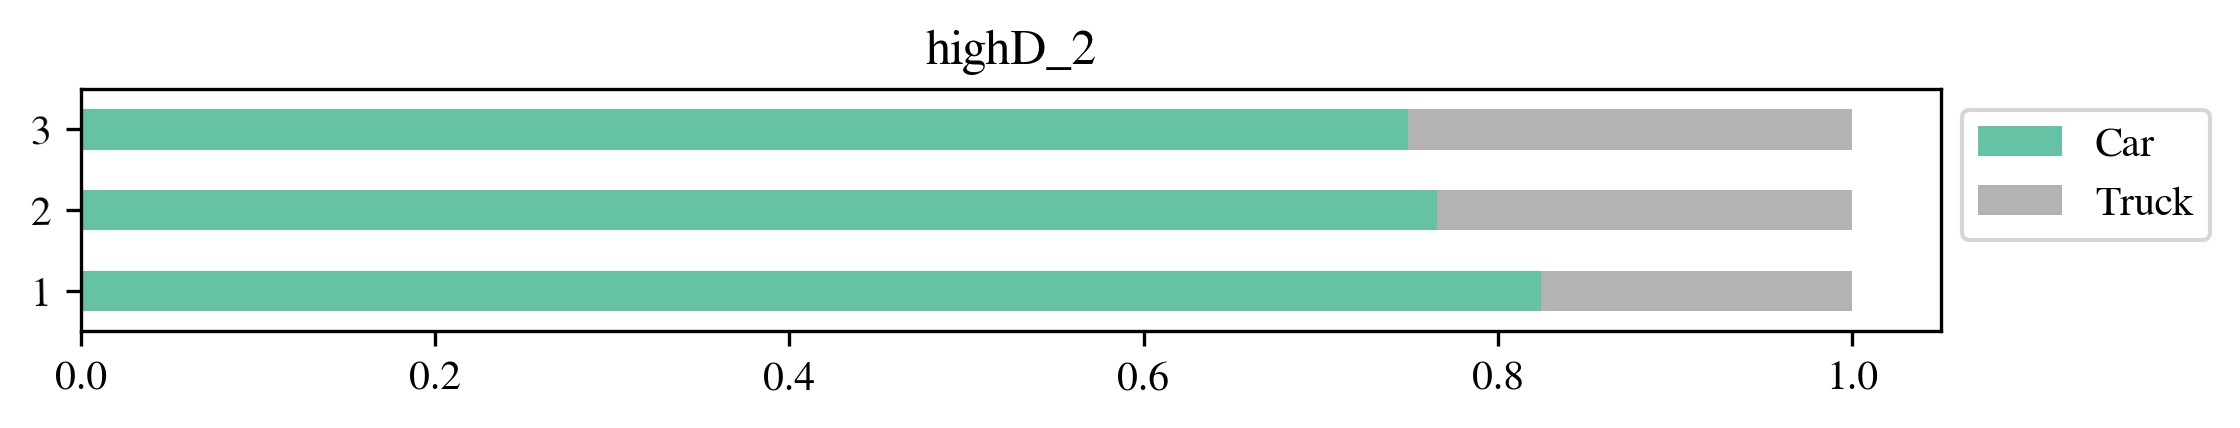

In [9]:
levelx.plot_class_proportion("highD_2", data_path, trajectory_types, configs)

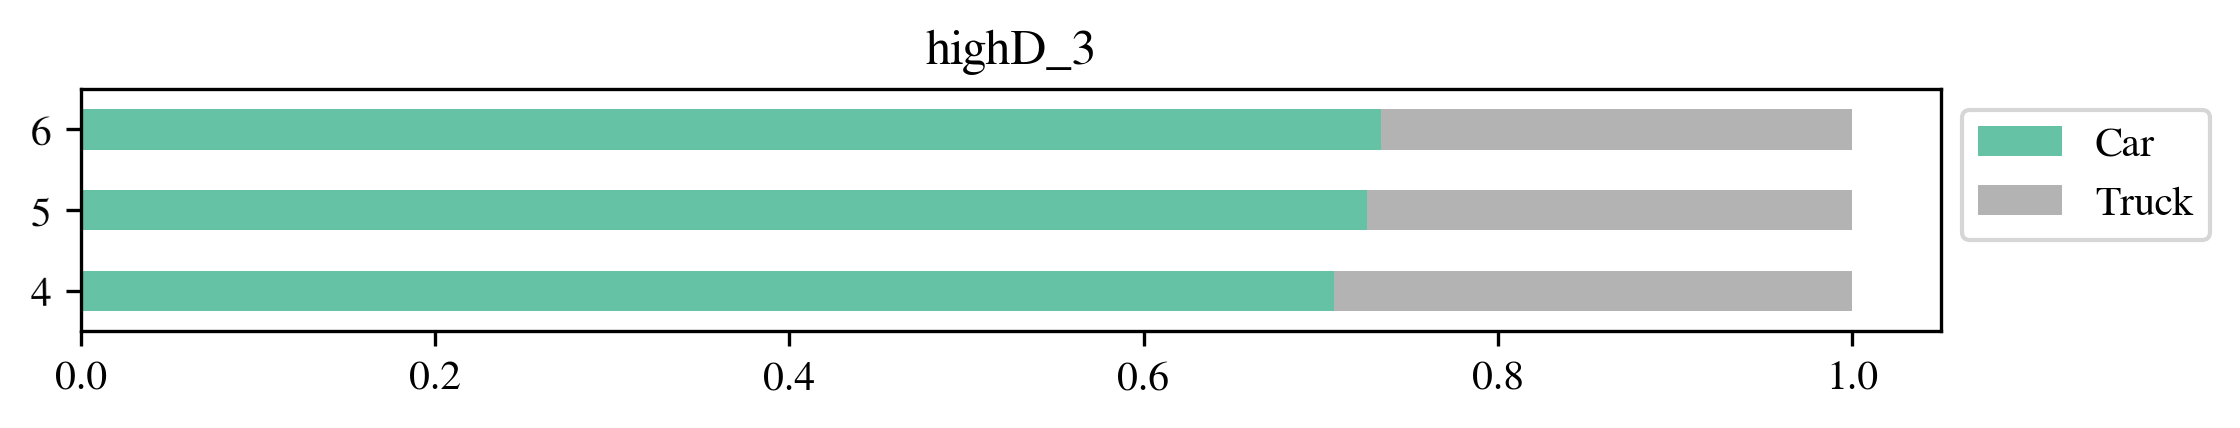

In [10]:
levelx.plot_class_proportion("highD_3", data_path, trajectory_types, configs)

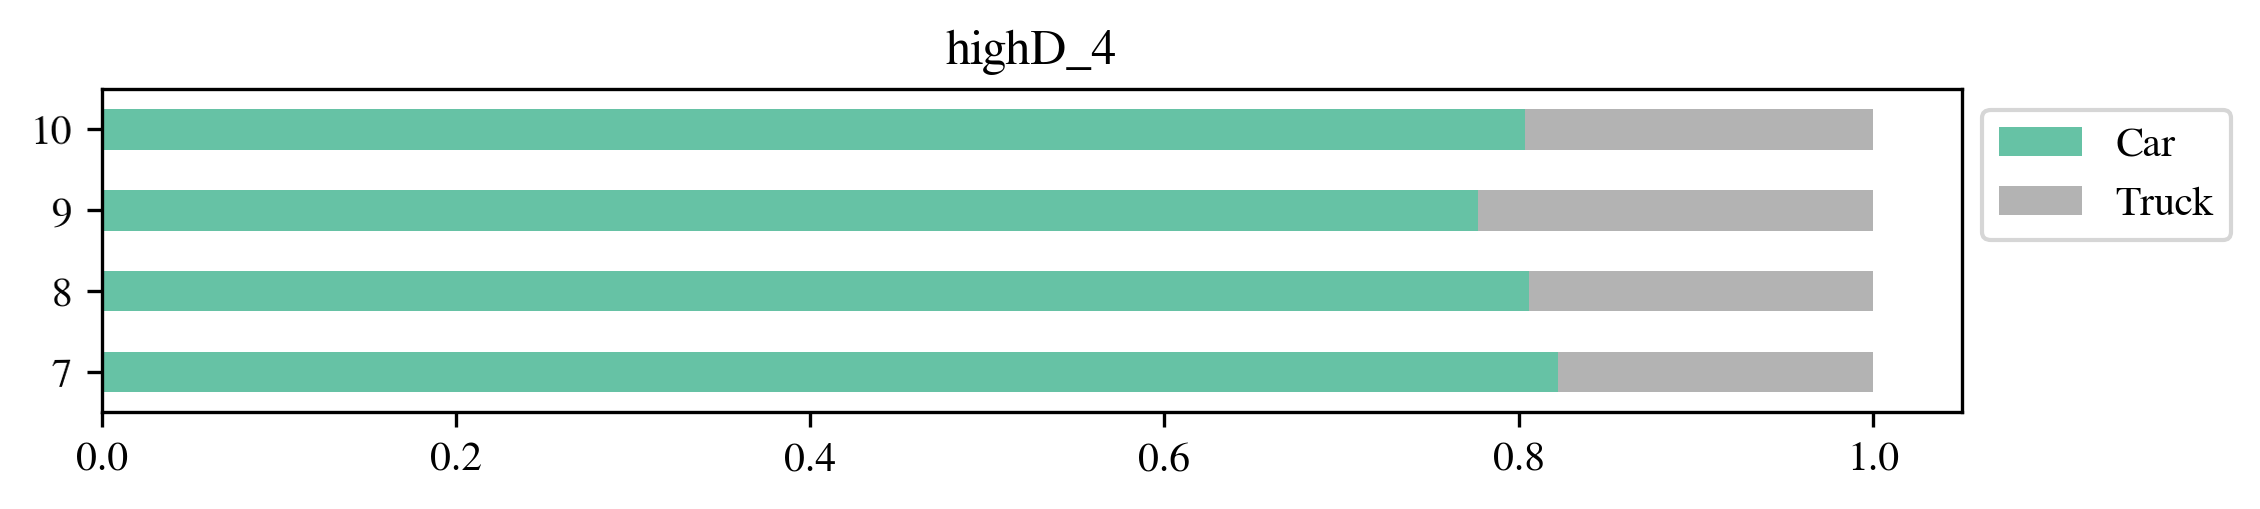

In [11]:
levelx.plot_class_proportion("highD_4", data_path, trajectory_types, configs)

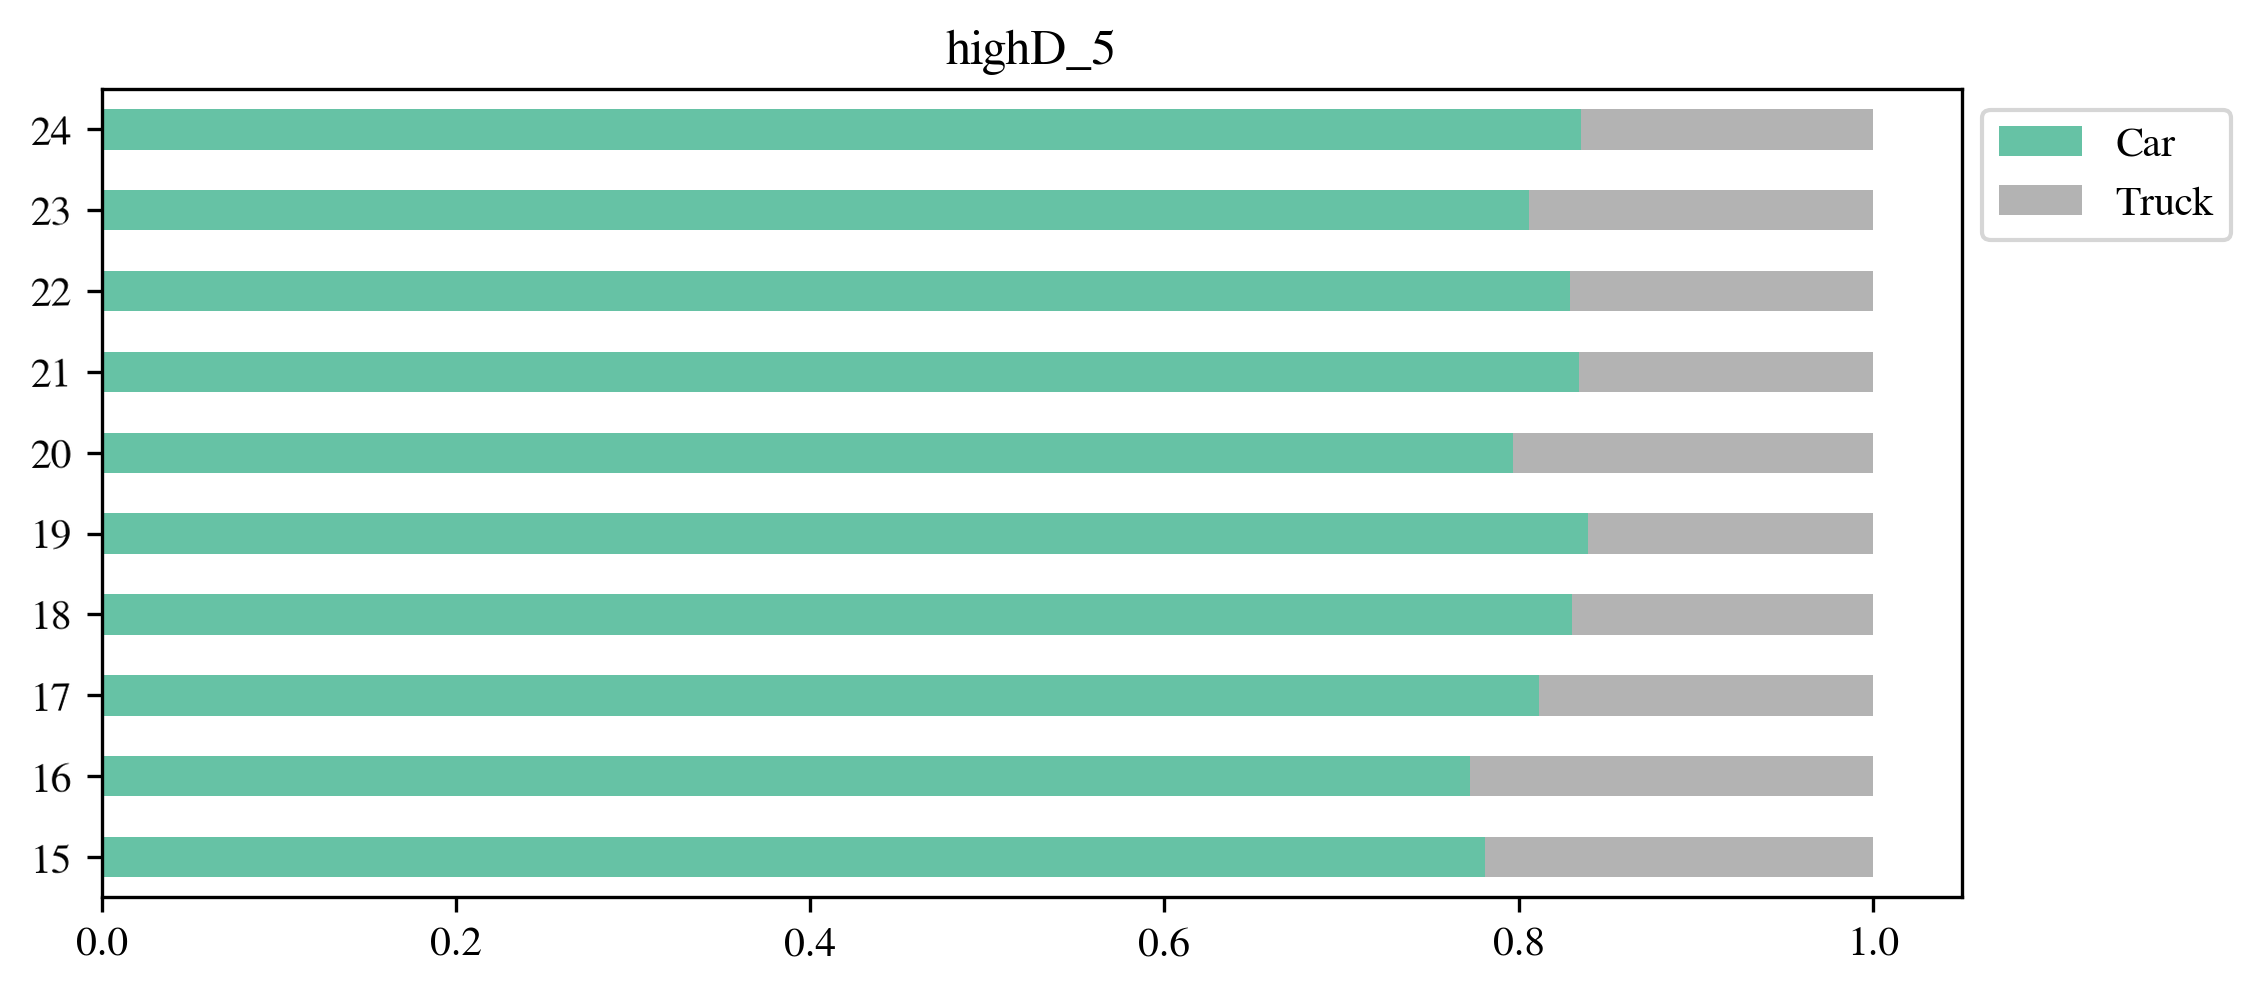

In [12]:
levelx.plot_class_proportion("highD_5", data_path, trajectory_types, configs)

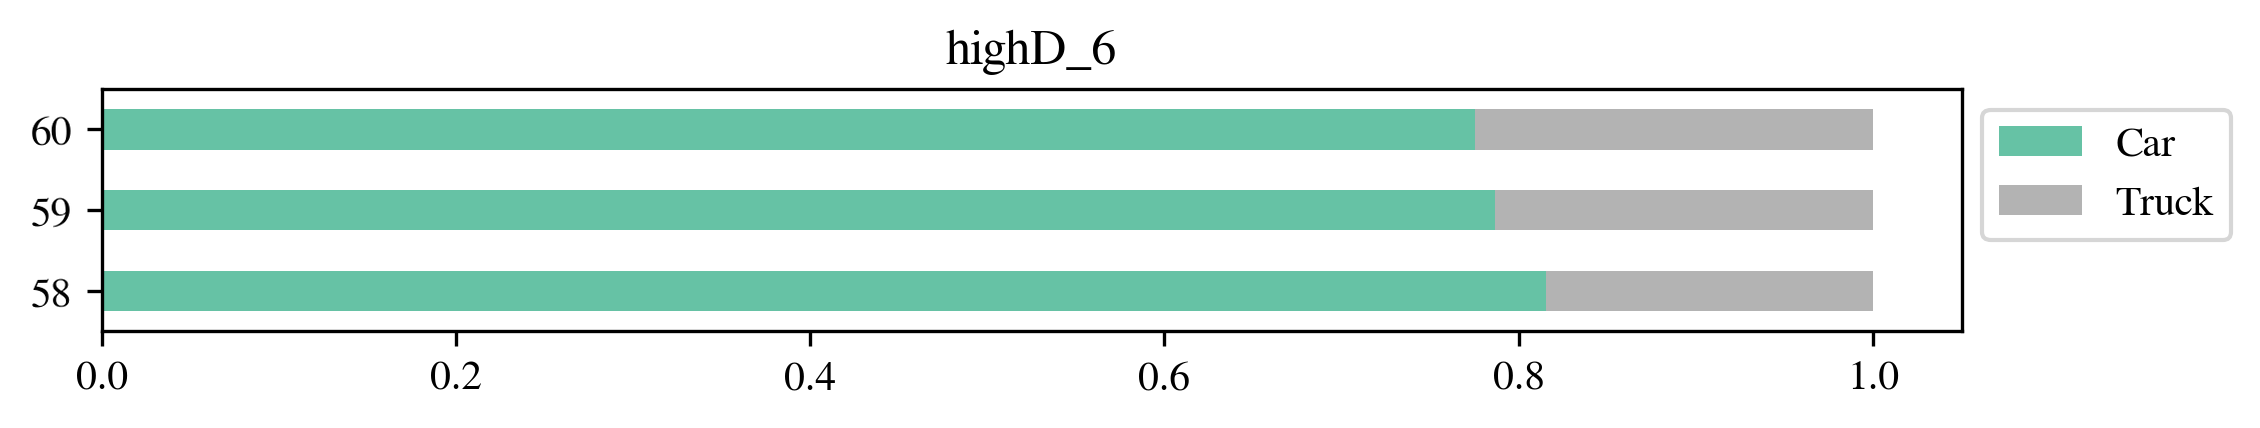

In [13]:
levelx.plot_class_proportion("highD_6", data_path, trajectory_types, configs)

### Lane Changing Frequency

It can be observed that cars change lanes more frequently than trucks.

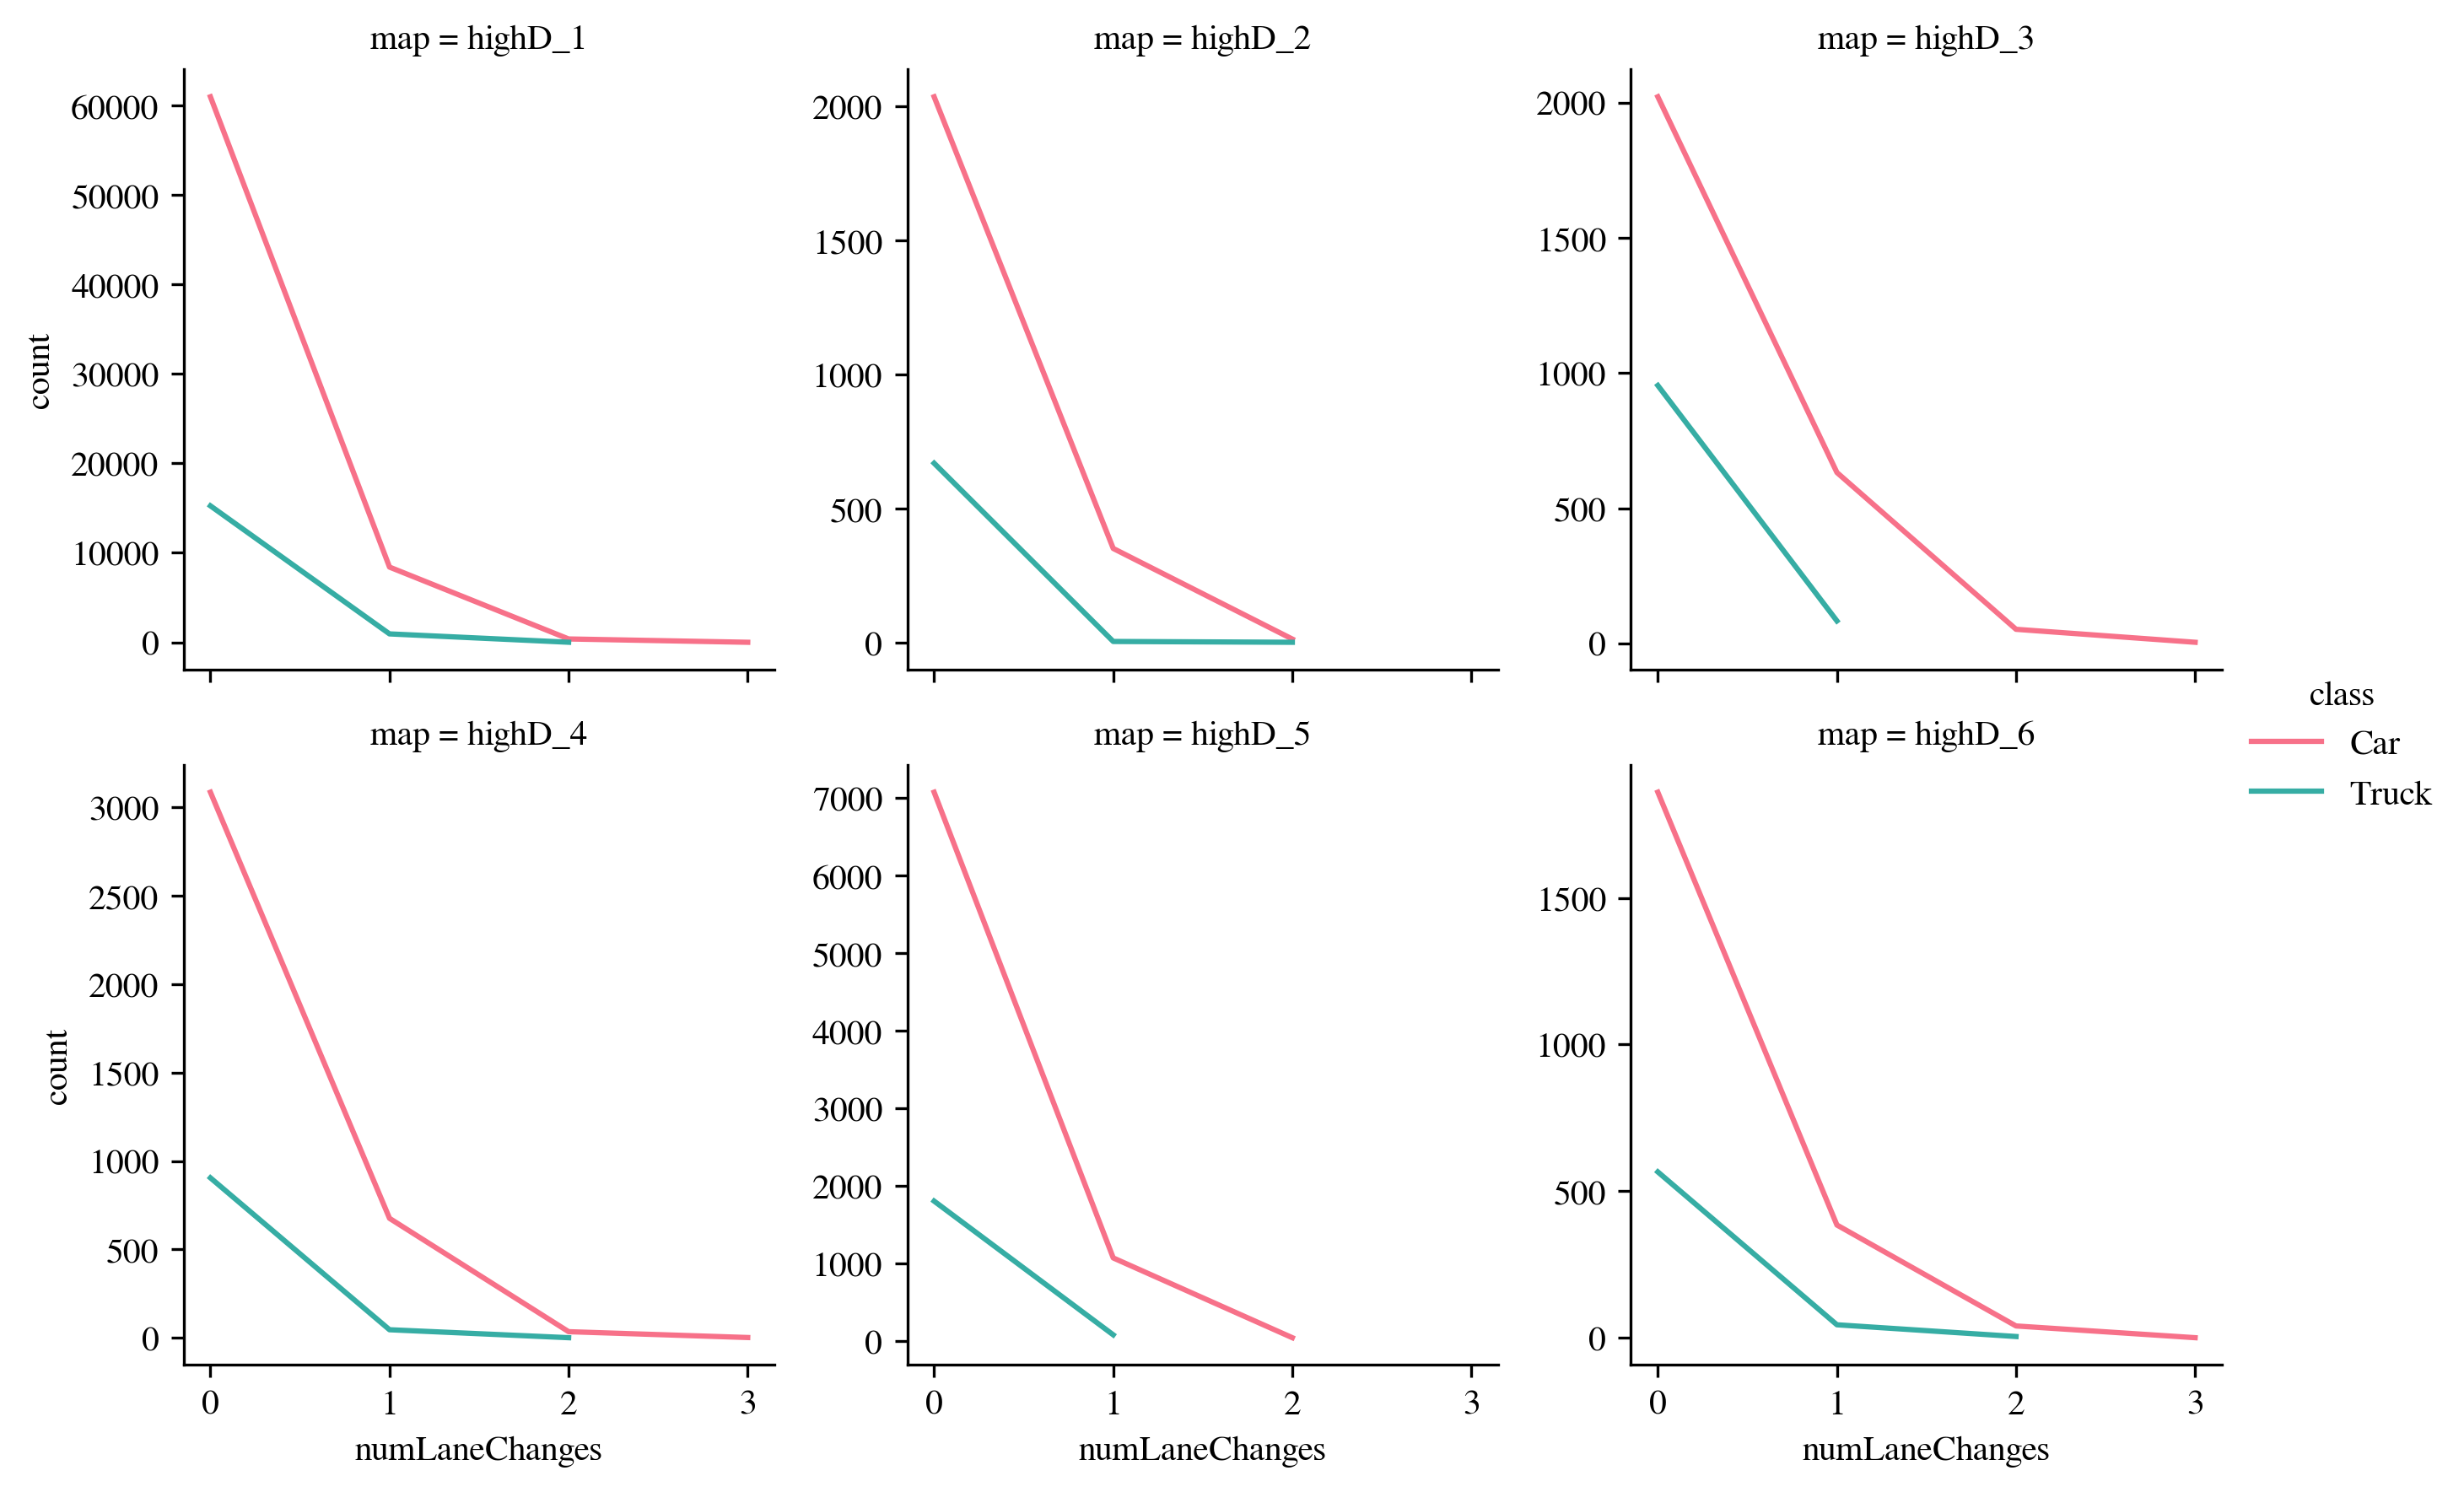

In [14]:
levelx.plot_lane_change_distribution("highD", data_path, trajectory_types, configs)

### Speed Distribution

The mean speed of cars is significantly higher than truck in the highways.

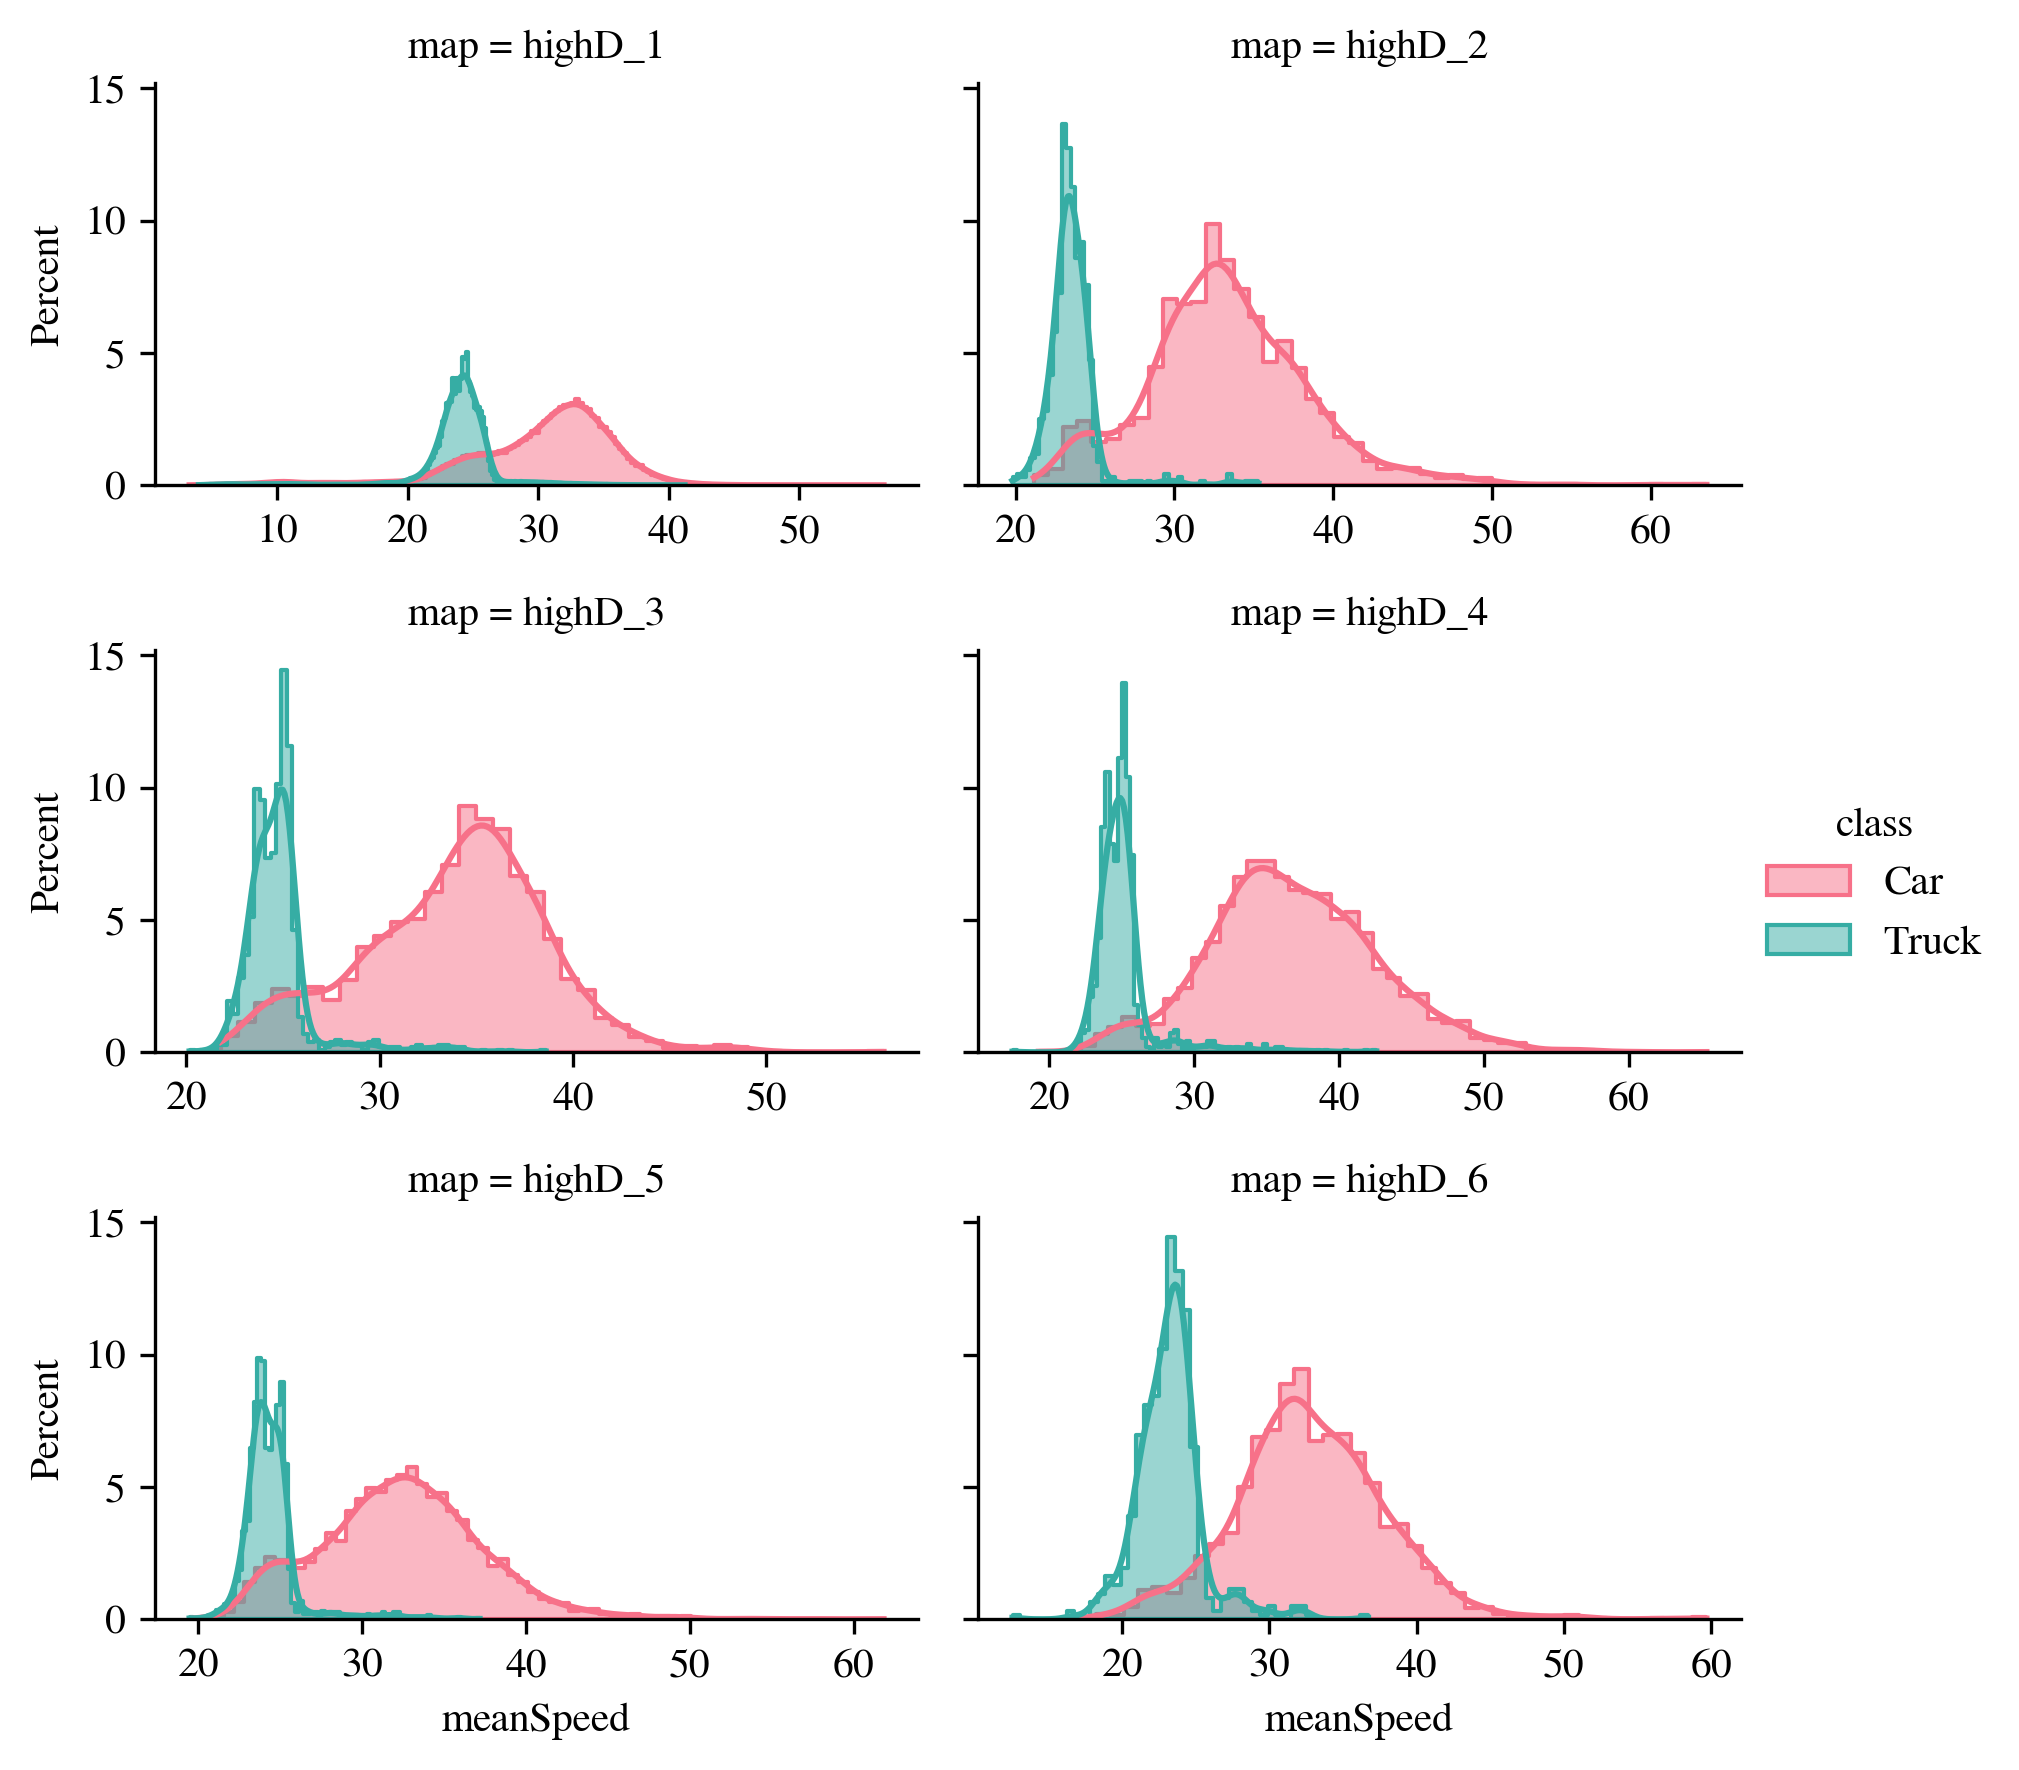

In [15]:
levelx.plot_mean_speed_distribution("highD", data_path, trajectory_types, configs)